Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
calories = pd.read_csv('/content/calories.csv')
#loading the data from csv file to a pandas DataFrame. Dataset from Kaggle.

In [ ]:
#print the first 5 rows od the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise_data = pd.read_csv('/content/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two Dataframes

In [ ]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [ ]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis


In [ ]:
# getting some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

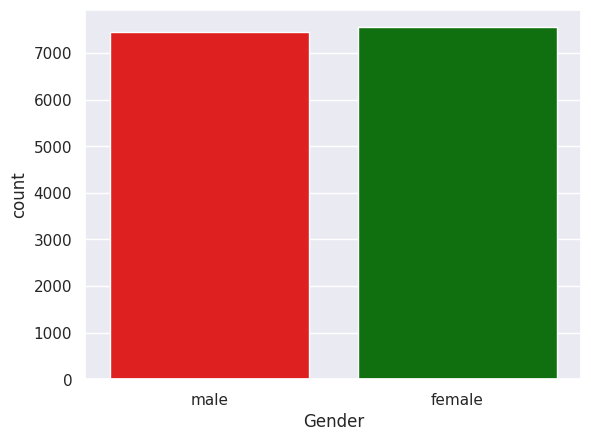

In [ ]:
# plotting the gender column in count plot
sns.countplot(x='Gender', data=calories_data, palette=['red', 'green'], hue='Gender', legend=False)


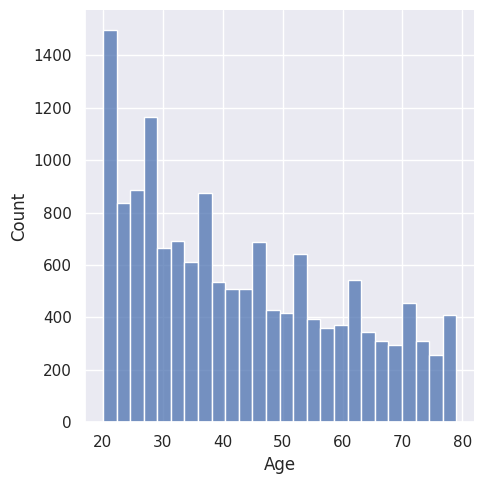

In [ ]:
# finding the distribution of "Age" column
sns.displot(calories_data['Age'])

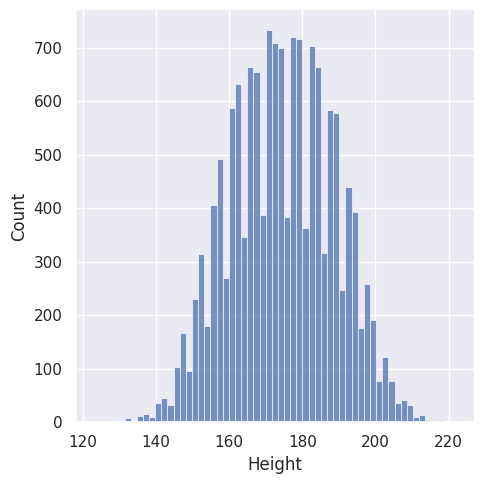

In [ ]:
# finding the distribution of "Height" column
sns.displot(calories_data['Height'])

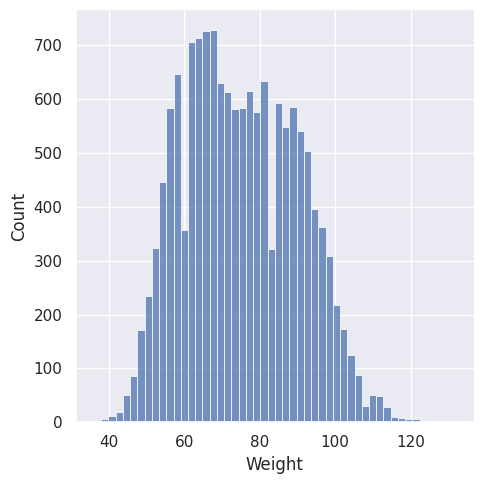

In [ ]:
# finding the distribution of "Weight" column
sns.displot(calories_data['Weight'])

Finding the Correlation in the dataset

1.   Positive Correlation
2.   Negative Correlation



In [ ]:
#converting categorical column 'Gender' to numeric using one-hot encoding
calories_data = pd.get_dummies(calories_data, columns=['Gender'])

# computing correlation
correlation = calories_data.corr()
print(correlation)


                User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID        1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age           -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height        -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight        -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration      -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate    -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp      0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories      -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   
Gender_female  0.000687 -0.003222 -0.710534 -0.783186 -0.003440   -0.011555   
Gender_male   -0.000687  0.003222  0.710534  0.783186  0.003440    0.011555   

               Body_Temp  Calories  Gender_female  Gender_male  
User_ID         0.000923 -0.001661       0.000687    -0.000687  


<Axes: >

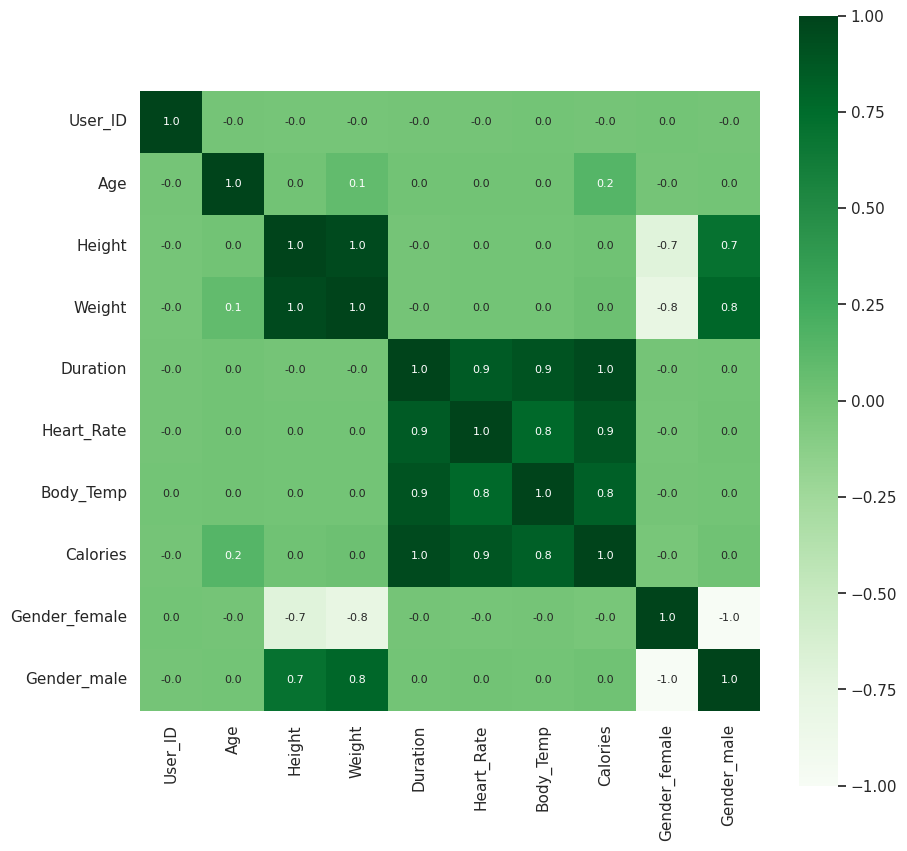

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')


Converting the text data to numerical values


In [ ]:
calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [ ]:
calories_data.head()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,14733363,68,190.0,94.0,29.0,105.0,40.8,231.0,False,True
1,14861698,20,166.0,60.0,14.0,94.0,40.3,66.0,True,False
2,11179863,69,179.0,79.0,5.0,88.0,38.7,26.0,False,True
3,16180408,34,179.0,71.0,13.0,100.0,40.5,71.0,True,False
4,17771927,27,154.0,58.0,10.0,81.0,39.8,35.0,True,False


Seperating Features and Target

In [ ]:
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [ ]:
print(X)

       Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Gender_female  \
0       68   190.0    94.0      29.0       105.0       40.8          False   
1       20   166.0    60.0      14.0        94.0       40.3           True   
2       69   179.0    79.0       5.0        88.0       38.7          False   
3       34   179.0    71.0      13.0       100.0       40.5           True   
4       27   154.0    58.0      10.0        81.0       39.8           True   
...    ...     ...     ...       ...         ...        ...            ...   
14995   20   193.0    86.0      11.0        92.0       40.4           True   
14996   27   165.0    65.0       6.0        85.0       39.2           True   
14997   43   159.0    58.0      16.0        90.0       40.1           True   
14998   78   193.0    97.0       2.0        84.0       38.3          False   
14999   63   173.0    79.0      18.0        92.0       40.5          False   

       Gender_male  
0             True  
1            False  


In [ ]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and Test data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


Model Training

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on Test Data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [ ]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [ ]:
print("Mean Absolute Error = ", mae)

Mean Absolute Error =  1.4836762582858403


In [48]:
accuracy = metrics.r2_score(Y_test, test_data_prediction)
print("Accuracy:", accuracy)


Accuracy: 0.998799522480255


In [49]:
accuracy_percent = accuracy * 100
print("Accuracy in percent:", accuracy_percent)


Accuracy in percent: 99.8799522480255


   Predicting the calorie expenditure based on user input.
   
   Args:
   input_data: A list containing the user's input values in the following order: **[Age, Height (in cm), Weight, Duration, Heart rate, Body temperature, Gender_female (1 or 0), Gender_male (1 or 0)] **
   
   Returns: The predicted number of calories burnt
    

In [ ]:
# model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

def predict_calories(input_data):

    # Convert input data to a DataFrame with consistent column names
    input_df = pd.DataFrame([input_data], columns=['Age', 'Height', 'Weight', 'Duration',
                                                   'Heart_Rate', 'Body_Temp', 'Gender_female',
                                                   'Gender_male'])

    # Replace categorical values with numerical values
    input_df['Gender_female'] = input_df['Gender_female'].astype(int)
    input_df['Gender_male'] = input_df['Gender_male'].astype(int)

    # Predict calories
    predicted_calories = model.predict(input_df)[0]

    return predicted_calories


def main():

    print("Please enter the following information to predict calories burnt:")

    Age = float(input("Age: "))
    Height = float(input("Height (in cm): "))
    Weight = float(input("Weight: "))
    Duration = float(input("Duration of activity (in minutes): "))
    Heart_Rate = float(input("Heart rate: "))
    Body_Temp = float(input("Body temperature: "))
    Gender_female = int(input("Is the gender female? (yes-1, no-0): "))
    Gender_male = int(input("Is the gender male? (yes-1, no-0): "))


    user_input = [Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Gender_female, Gender_male]

    predicted_calories = predict_calories(user_input)

    print(f"\nPredicted calories burnt: {predicted_calories:.2f} calories")

if __name__ == "__main__":
    main()


Please enter the following information to predict calories burnt:
Age: 25
Height (in cm): 155
Weight: 44
Duration of activity (in minutes): 45
Heart rate: 102
Body temperature: 45
Is the gender female? (yes-1, no-0): 1
Is the gender male? (yes-1, no-0): 0

Predicted calories burnt: 169.97 calories
